<a href="https://colab.research.google.com/github/kandkurteram/course-v3/blob/master/RamK_Lesson5_sgd_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from fastai.basics import *

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [4]:
path = Path(base_dir + 'data/mnist/')
print(path)

/content/gdrive/My Drive/fastai-v3/data/mnist


In [5]:
path.ls()

[PosixPath('/content/gdrive/My Drive/fastai-v3/data/mnist/mnist.pkl.gz')]

In [0]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
  ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

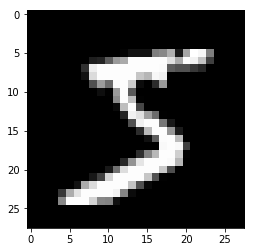

In [7]:
plt.imshow(x_train[0].reshape((28, 28)), cmap="gray")

In [0]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [0]:
bs=64
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)
data = DataBunch.create(train_ds, valid_ds, bs)

In [10]:
x, y = next(iter(data.train_dl))
y

tensor([3, 2, 8, 6, 0, 0, 3, 8, 8, 5, 8, 5, 4, 7, 1, 4, 6, 6, 0, 7, 1, 1, 8, 5,
        8, 4, 1, 7, 5, 3, 8, 9, 4, 2, 1, 0, 4, 3, 8, 3, 0, 2, 2, 6, 3, 3, 3, 8,
        9, 0, 0, 9, 1, 8, 8, 5, 7, 2, 8, 4, 1, 6, 9, 6])

In [0]:
class Mnist_NN(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(784, 50, bias=True)
    self.lin2 = nn.Linear(50, 10, bias=True)
    
  def forward(self, xb):
    x = self.lin1(xb)
    x = F.relu(x)
    return self.lin2(x)
    

In [0]:
model = Mnist_NN()

In [25]:
model

Mnist_NN(
  (lin1): Linear(in_features=784, out_features=50, bias=True)
  (lin2): Linear(in_features=50, out_features=10, bias=True)
)

In [26]:
model(x).shape

torch.Size([64, 10])

In [27]:
[p.shape for p in model.parameters()]

[torch.Size([50, 784]),
 torch.Size([50]),
 torch.Size([10, 50]),
 torch.Size([10])]

In [0]:
loss_func = nn.CrossEntropyLoss()

In [0]:
def update(x, y, lr):
  opt = optim.Adam(model.parameters(), lr)
  y_hat =  model(x)
  loss = loss_func(y_hat, y)
  loss.backward()
  opt.step()
  opt.zero_grad()
  return loss.item()
  

In [0]:
losses = [update(x, y, 1e-3) for x, y in data.train_dl]

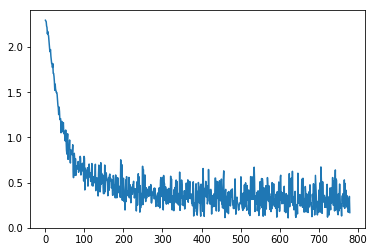

In [31]:
plt.plot(losses)